# Week 7 handin

## 01 Assignment
Here is the text for the assignment linked to

## 02 Status
Here is a status on the handin. How far you got. What is implemented and what is not

# Ex 1 

For the following task you will need to use the website: https://www.dba.dk/

    1. Create a BeautifulSoup Object from the link given above
    2. Find all the "Kategorier"
    3. Find all the links
    4. Use selenium to press the "Kategory" link with the name "biler"
    5. In the category "biler" theres a list with cities to see where the sales of cars is located. Make a bar plot from lowest to highest showing the amount of car sale in each city.



In [1]:
import bs4
import requests

request = requests.get('https://www.dba.dk/', headers={'User-Agent': 'Mozilla/5.0'})
request.raise_for_status()
soup = bs4.BeautifulSoup(request.text, 'html.parser')

print(soup.prettify())

<!DOCTYPE doctype html>
<html lang="da">
 <head>
  <meta charset="utf-8"/>
  <link href="https://www.dba.dk/" rel="canonical"/>
  <link href="https://dbastatic.dk/Content/dba.ico?2.0.0.0-2d3f37b" rel="shortcut icon" type="image/x-icon"/>
  <link href="https://dbastatic.dk/Content/dba.ico?2.0.0.0-2d3f37b" rel="icon" type="image/x-icon"/>
  <meta content="width=960" name="viewport"/>
  <meta content="nositelinkssearchbox" name="google"/>
  <title>
   Nyt og brugt, køb og salg på DBA - Danmarks største handelsportal
  </title>
  <meta content="Danmarks største annoncemarked med køb, salg og bytte for private og virksomheder" name="description">
   <meta content="Annoncemarked, brugt, køb, salg, bytte, handel, sælges, købes, handelsplads, søges, tilbydes, gratis, byttes" name="keywords"/>
   <meta content="G_j_o68WxUOQ_1F0FDuxfWDevmK1Y4OO6pkzhLcOezk" name="google-site-verification"/>
   <meta content="E6E42FA5BF8F4E79B804C29298212B50" name="msvalidate.01"/>
   <link as="font" crossorigin="

In [2]:
categories = soup.select("li.single")

for c in categories:
    print(c.text)


 
Biler


 
Camping


 
Biltilbehør


 
Boliger


 
Have og byg


 
Til boligen


 
Til børn


 
Tøj og mode


 
Sport og fritid


 
Både


 
Cykler


 
Hobby


 
Computer og spillekonsoller


 
Mobil og telefoni


 
Dyr


 
Billede og lyd


 
Musikinstrumenter


 
Motorcykler og tilbehør


 
Scootere og knallerter


 
Diverse


 
Erhverv


 
Job


 
Ferie


 
Billetter


 
Bøger og blade



Vis alle kategorier




In [128]:
all_links = soup.select('a')

for link in all_links:
    if str(link.get('href')).startswith("https://"):
        print(link.get('href'))

https://www.dba.dk/
https://guide.dba.dk
https://support.dba.dk/
https://www.dba.dk/
https://www.dba.dk/biler/reg-koebenhavn-og-omegn/
https://www.dba.dk/biler/reg-aarhus/
https://www.dba.dk/biler/reg-odense/
https://www.dba.dk/biler/reg-aalborg/
https://www.dba.dk/biler/reg-sjaelland/
https://www.dba.dk/biler/reg-jylland/
https://www.dba.dk/biler/reg-fyn/
https://www.dba.dk/biler/reg-bornholm/
https://www.dba.dk/biler/reg-groenland/
https://info.dba.dk/biler/vaerkstedsservice
https://support.dba.dk/
https://info.dba.dk/kontakt/
https://jobs.ebayclassifiedsgroup.com/dba
https://dba.presscloud.com/nr/#/
https://guide.dba.dk
https://sikkerhed.dba.dk/
https://info.dba.dk/vilkaar/brugervilkaar
https://info.dba.dk/vilkaar/annonceringsregler
https://info.dba.dk/vilkaar/persondatapolitik
https://boost.dba.dk
https://www.bilbasen.dk
https://www.dba.dk/
https://da-dk.facebook.com/dba.dk
https://twitter.com/dba_dk


In [4]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

options = Options()
options.headless = True
browser = webdriver.Firefox(options=options)
browser.get('https://www.dba.dk/')

browser.implicitly_wait(3)

link_biler = browser.find_elements_by_link_text('Biler')
print(link_biler)

link_biler[0].click()



[<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="a8ffbeb4-2bac-441d-a27c-2b26f048bc9d", element="fa72b219-e478-45d1-97a1-9246766af3c2")>]


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

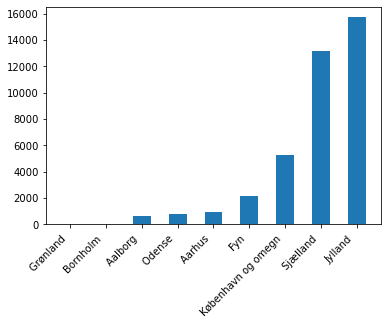

In [126]:
import matplotlib.pyplot as plt

request = requests.get('https://www.dba.dk/biler', headers={'User-Agent': 'Mozilla/5.0'})
request.raise_for_status()
soup = bs4.BeautifulSoup(request.text, 'html.parser')



all_cars = soup.select('nav.row-fluid small')
all_cars.pop(0);

all_cities = soup.select("nav.row-fluid a ")
cars = []
cities = []


for city in all_cities:
    cities.append(city.text.split("(")[0])
    

for car in all_cars:
    if car.text != "(0)":
        cars.append(car.text.split("(")[1].split(")")[0])


    
res = {cities[i]: int(cars[i]) for i in range(len(cities))}


sorted_res = {k: v for k, v in sorted(res.items(), key=lambda res: res[1])}





plt.bar(sorted_res.keys(),sorted_res.values(),width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
